## NETFLIX DATA ANALYSIS PROJECT USING PYTHON + SQL + POWER BI

<div style="text-align: center; background-color: black;">
  <span style="font-size: 72px; color: red; font-weight: bold;">NETFLIX</span>
</div>

## Problem Statement

#### Netflix wants to know the analytics about their data.
#### They want to understand the viewer behaviour by analyzing content and ratings.
#### They also want to know about directors producing the maximum content.
#### Which is the country with highest Viewers?
#### Which genre is most liked by the viewers? And most rated Movies and TV shows ?



In [44]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Connecting Python with SQL

In [3]:
config = {
    'user': 'root',
    'password': 'Ushanshish@5656',
    'host': 'localhost',
    'database': 'Netflix',
}

In [4]:
conn = mysql.connector.connect(**config)

In [5]:
cursor = conn.cursor()

In [6]:
df = df.fillna('')

In [7]:
create_table_query = '''
CREATE TABLE IF NOT EXISTS netflix_titles (
    show_id VARCHAR(255),
    type VARCHAR(255),
    title VARCHAR(255),
    director VARCHAR(255),
    cast TEXT,
    country VARCHAR(255),
    date_added VARCHAR(255),
    release_year INT,
    rating VARCHAR(255),
    duration VARCHAR(255),
    listed_in VARCHAR(255),
    description TEXT
)
'''
cursor.execute(create_table_query)

In [8]:
columns = [
    "show_id VARCHAR(10)",
    "type VARCHAR(50)",
    "title VARCHAR(255)",
    "director VARCHAR(255)",
    "cast TEXT",
    "country VARCHAR(100)",
    "date_added VARCHAR(50)",
    "release_year INT",
    "rating VARCHAR(50)",
    "duration VARCHAR(50)",
    "listed_in VARCHAR(255)",
    "description TEXT"
]


In [9]:
table_name = 'netflix_titles'

create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    {', '.join(columns)}
)
"""
cursor.execute(create_table_query)

print(f"Table '{table_name}' is ready.")

Table 'netflix_titles' is ready.


In [10]:
import pandas as pd

# Loading the DataFrame
df = pd.read_csv('netflix_titles.csv')

# Replacing NaN values with a default value
df = df.fillna('')

print("DataFrame loaded and NaN values handled.")


DataFrame loaded and NaN values handled.


In [11]:
# Insert query
columns_list = ', '.join(df.columns)
placeholders = ', '.join(['%s'] * len(df.columns))
insert_query = f"INSERT INTO {table_name} ({columns_list}) VALUES ({placeholders})"

# Inserting DataFrame records one by one
for row in df.itertuples(index=False, name=None):
    cursor.execute(insert_query, row)

conn.commit()

print("DataFrame data inserted into the table successfully.")


DataFrame data inserted into the table successfully.


In [12]:
len(df)

8807

## Spliting Director column

In [13]:
# Split the director column
df_directors = df[['show_id', 'director']].copy()
df_directors['director'] = df_directors['director'].str.split(',')

In [14]:
# Explode the list of directors into separate rows
df_directors = df_directors.explode('director')

In [15]:
# Remove leading/trailing whitespace from director names
df_directors['director'] = df_directors['director'].str.strip()

In [16]:
df_directors.tail()

,show_id,director
8802,s8803,David Fincher
8803,s8804,
8804,s8805,Ruben Fleischer
8805,s8806,Peter Hewitt
8806,s8807,Mozez Singh


In [17]:
netflix_directors = df_directors.to_csv("netflix_directors.csv")

## Splitting Country column

In [18]:
df_country = df[["show_id","country"]].copy()
df_country["country"] = df_country["country"].str.split(',')

In [19]:
df_country = df_country.explode('country')

In [20]:
df_country["country"] = df_country["country"].str.strip() 

In [21]:
df_country.head()

,show_id,country
0,s1,United States
1,s2,South Africa
2,s3,
3,s4,
4,s5,India


In [22]:
df_country.to_csv("netflix_country.csv")

## Splitting Cast column

In [23]:
df_cast = df[["show_id", "cast"]].copy()
df_cast["cast"] = df_cast["cast"].str.split(",")

In [24]:
df_cast = df_cast.explode("cast")

In [25]:
df_cast["cast"] = df_cast["cast"].str.strip() 

In [26]:
df_cast.head()

,show_id,cast
0,s1,
1,s2,Ama Qamata
1,s2,Khosi Ngema
1,s2,Gail Mabalane
1,s2,Thabang Molaba


In [27]:
df_cast.to_csv("netflix_cast.csv")

## Splitting Listed_in column

In [28]:
df_listed_in = df[["show_id", "listed_in"]].copy()
df_listed_in["listed_in"] = df_listed_in["listed_in"].str.split(",")

In [29]:
df_listed_in = df_listed_in.explode("listed_in")

In [30]:
df_listed_in["listed_in"] = df_listed_in["listed_in"].str.strip() 

In [31]:
df_listed_in.head()

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
1,s2,TV Dramas
1,s2,TV Mysteries
2,s3,Crime TV Shows


In [32]:
df_listed_in.to_csv("netflix_genre.csv")

In [38]:
df.replace('', np.NaN, inplace = True)

## DATA ANALYSIS ON NETFLIX USING VISULALIZATION

In [39]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

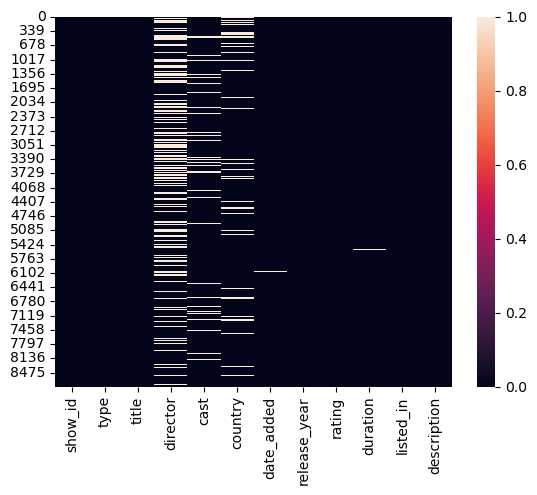

In [42]:
sns.heatmap(df.isna())

## In which year the highest number of the TV Shows & Movies were released ? 

In [45]:
high_release = df.release_year.value_counts().head(5)
high_release

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64

<Axes: xlabel='release_year'>

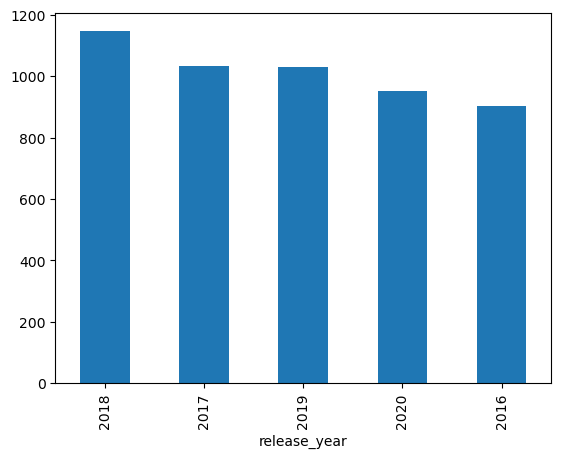

In [46]:
high_release.plot(kind="bar")

### show the total number of movies and TV shows.

In [47]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<Axes: >

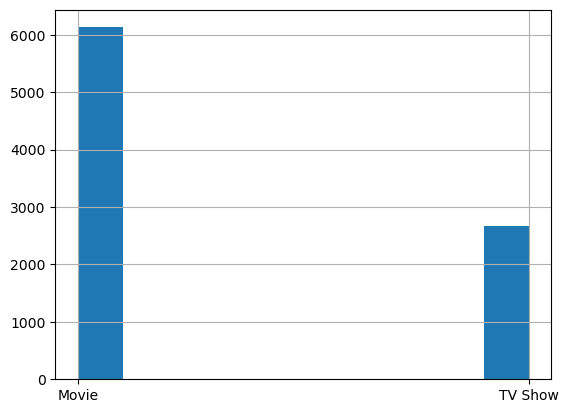

In [48]:
df.type.hist()

### Show top 5 by directors with highest movies produced

In [53]:
df.groupby("director")["director"].count().sort_values(ascending = False).head()

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Name: director, dtype: int64

In [60]:
director_counts = df['director'].value_counts().sort_values(ascending = False).reset_index().head()
director_counts

,director,count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14


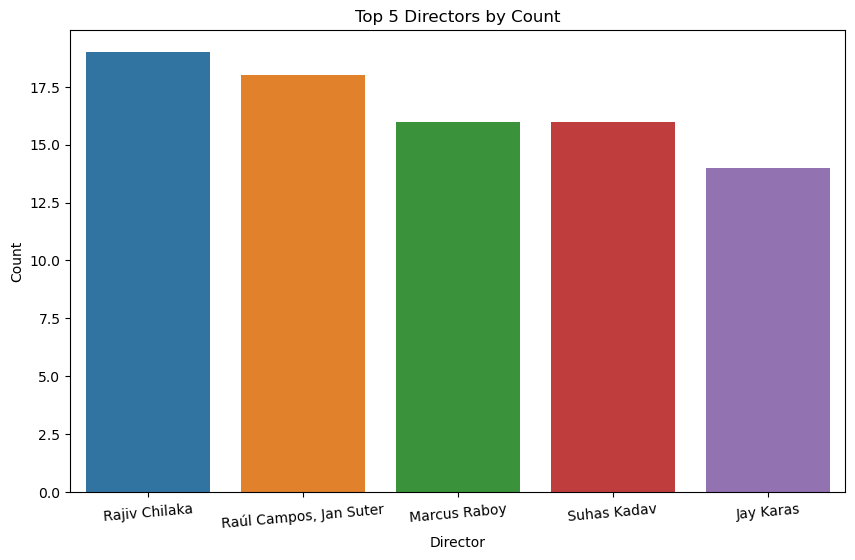

In [69]:
plt.figure(figsize = (10,6))
sns.barplot(data = director_counts , x="director", y="count")
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Top 5 Directors by Count')
plt.xticks(rotation=5)
plt.show()

# CONCLUSION 

### We have analyzed Netflix Data set using Python, SQL and Power BI .
### First of all we cleaned the raw data by removing duplicates, handlig null values, changing datatypes, creating new tables for comma seperated values by using SQL and Python.
### Then we started Analysing data by answering some question using SQL like country with highest releases, avg genre time, etc.
### Then we analyzed the dataset using visualization libraries like seaborn and matplotlib in Python and finding the answers about top 5 directors, total no of movies and TV shows available on Netflix, etc.
### Then we analyzed by creating interactive Dashboard using Power BI to find out best rated movies, countries with available content, ratings as per genre and many more.

# FINDINGS

## Key Findings
### 1. **Content Production**
   #### - USA contributes about 42% of the available content on Netflix.

### 2. **Top Rated Movies**
   #### - The best-rated movie is "CM 101" from Turkey, genre - Comedy, with an average rating of about 9.2.

### 3. **Top Rated TV Show**
   #### - The best-rated TV show is "Stranger Things" from the USA, genre - Talk Show, with an average rating of about 9.4.

### 4. **Overall Netflix Rating**
   #### - The overall Netflix rating is about 6.7 based on 110 million votes.

### 5. **Preferred Genre**
   #### - Comedy is the most preferred genre on Netflix with over 1300 available titles.

# SUGGESTIONS

## Based on the key findings from analysis of the Netflix dataset, here are several suggestions that Netflix could consider:

###  **Diversify Content Production**
#### While the USA contributes a significant portion (42%) of the available content on Netflix, there is an opportunity to diversify content production by increasing investments in content from other countries. This could attract a wider global audience and cater to diverse tastes and preferences.

### **Promoting High-Rated Content**
#### Promote high-rated movies like "CM 101" from Turkey to audiences globally, emphasizing its high rating and unique comedic appeal.
#### Similarly, continue to highlight "Stranger Things" as a flagship show, leveraging its popularity and high rating to attract and retain subscribers.

### **Improving Recommendation Algorithms**
#### Netflix can enhance recommendation algorithms to ensure that top-rated content are easily discoverable by users who may enjoy these genres or types of content.
#### Include user preferences and high-rated content as key factors in personalized recommendations.

### **Global Strategy Alignment**
#### Invest in localized content production to cater to specific regional tastes and preferences, increasing engagement and satisfaction among international subscribers.

<div style="text-align: center; background-color: black;">
    <span style="font-size: 72px; color: red; font-weight: bold;">THANK YOU</span>
</div>
